# Practical Sheet - Part 4 (LVQ)

First some imports:

In [15]:
import matplotlib
%matplotlib notebook
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn_lvq import GmlvqModel, GrlvqModel
#from sklearn_lvq.utils import plot2d
from sklearn.metrics import accuracy_score
from mpl_toolkits.mplot3d import Axes3D

Create an artificial classification data set with 2 features and 3 classes.

In [16]:
X, y = make_classification(
                    n_samples = 1000,
                    n_features = 2,
                    n_informative = 2,
                    n_redundant = 0,
                    n_repeated = 0,
                    n_classes = 3,
                    n_clusters_per_class=1,
                    random_state = 42)

Preprocessing: We standardize our Data Set

<IPython.core.display.Javascript object>


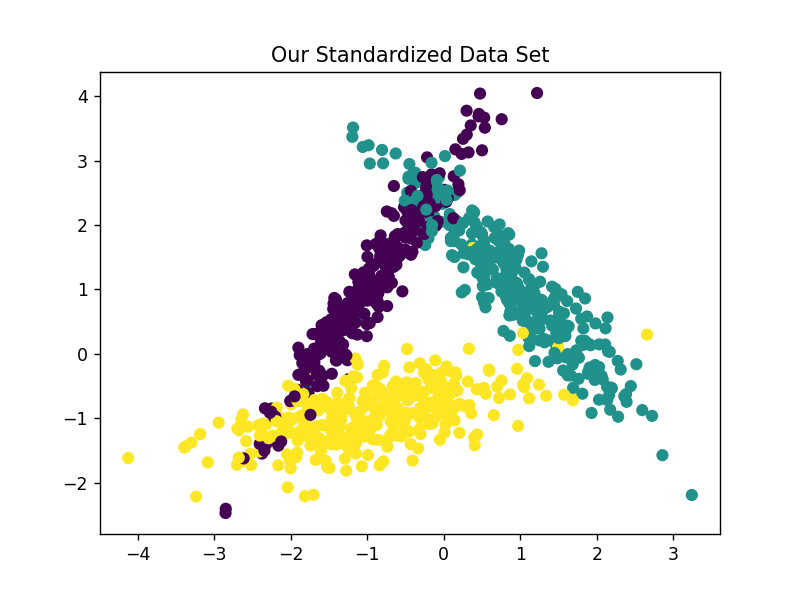

In [17]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

plt.scatter(X[:,0],X[:,1], c=y)
plt.title("Our Standardized Data Set")
plt.show()

Project the data into 5/50 dimensions, using a random matrix.

In [18]:
# Creating our random matrices
projection_matrix_5d = np.random.randn(2, 5)
inverse_matrix_5d = np.linalg.pinv(projection_matrix_5d)
projection_matrix_50d = np.random.randn(2, 50)
inverse_matrix_50d = np.linalg.pinv(projection_matrix_50d)

<IPython.core.display.Javascript object>


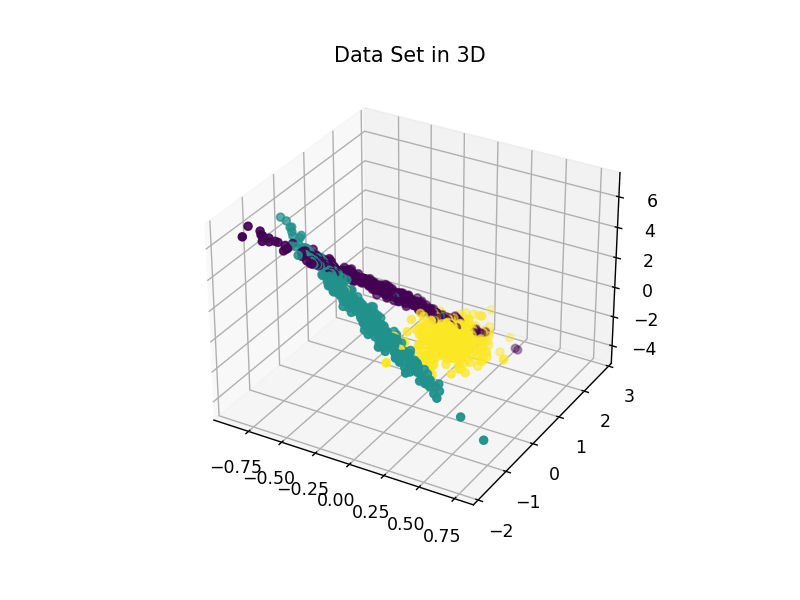

In [19]:

X_5d = np.dot(X, projection_matrix_5d)
X_50d = np.dot(X, projection_matrix_50d)

# Plotted the data set in a higher dimension
# We can sadly only see 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_5d[:, 0], X_5d[:, 1], X_5d[:, 2], c=y)
ax.set_title("Data Set in 3D")
plt.show()

On the projected data\
Evaluation:

Evaluate GRLVQ:

In [20]:
grlvq_5d = GrlvqModel(random_state=42)
grlvq_5d.fit(X_5d, y)

y_pred_5d_grlvq = grlvq_5d.predict(X_5d)
accuracy_5d_grlvq = accuracy_score(y, y_pred_5d_grlvq)

grlvq_50d = GrlvqModel(random_state=42)
grlvq_50d.fit(X_50d, y)
grlvq_50d.get_params

y_pred_50d_grlvq = grlvq_50d.predict(X_50d)
accuracy_50d_grlvq = accuracy_score(y, y_pred_50d_grlvq)

print(f"GRLVQ - Accuracy Score (5D): {accuracy_5d_grlvq:.2f}")
print(f"GRLVQ - Accuracy Score (50D): {accuracy_50d_grlvq:.2f}")

GRLVQ - Accuracy Score (5D): 0.87
GRLVQ - Accuracy Score (50D): 0.82


Evaluate GMLVQ:

In [21]:
gmlvq_5d = GmlvqModel(random_state=42)
gmlvq_5d.fit(X_5d, y)

y_pred_5d_gmlvq = gmlvq_5d.predict(X_5d)
accuracy_5d_gmlvq = accuracy_score(y, y_pred_5d_gmlvq)

gmlvq_50d = GmlvqModel(random_state=42)
gmlvq_50d.fit(X_50d, y)

y_pred_50d_gmlvq = gmlvq_50d.predict(X_50d)
accuracy_50d_gmlvq = accuracy_score(y, y_pred_50d_gmlvq)

print(f"GMLVQ - Accuracy Score (5D): {accuracy_5d_gmlvq:.2f}")
print(f"GMLVQ - Accuracy Score (50D): {accuracy_50d_gmlvq:.2f}")

GMLVQ - Accuracy Score (5D): 0.88
GMLVQ - Accuracy Score (50D): 0.88


Plot results in original space and compare:

<IPython.core.display.Javascript object>


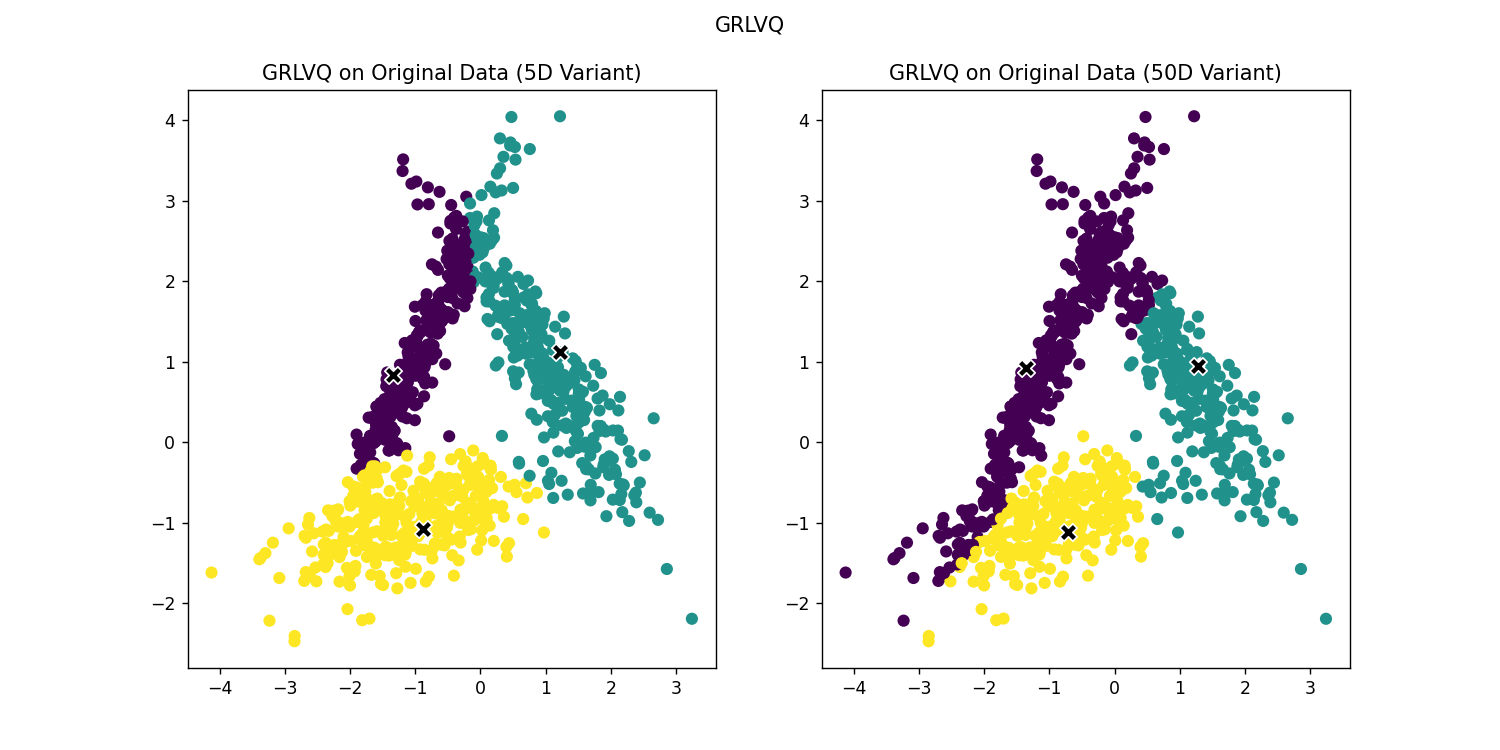

<IPython.core.display.Javascript object>


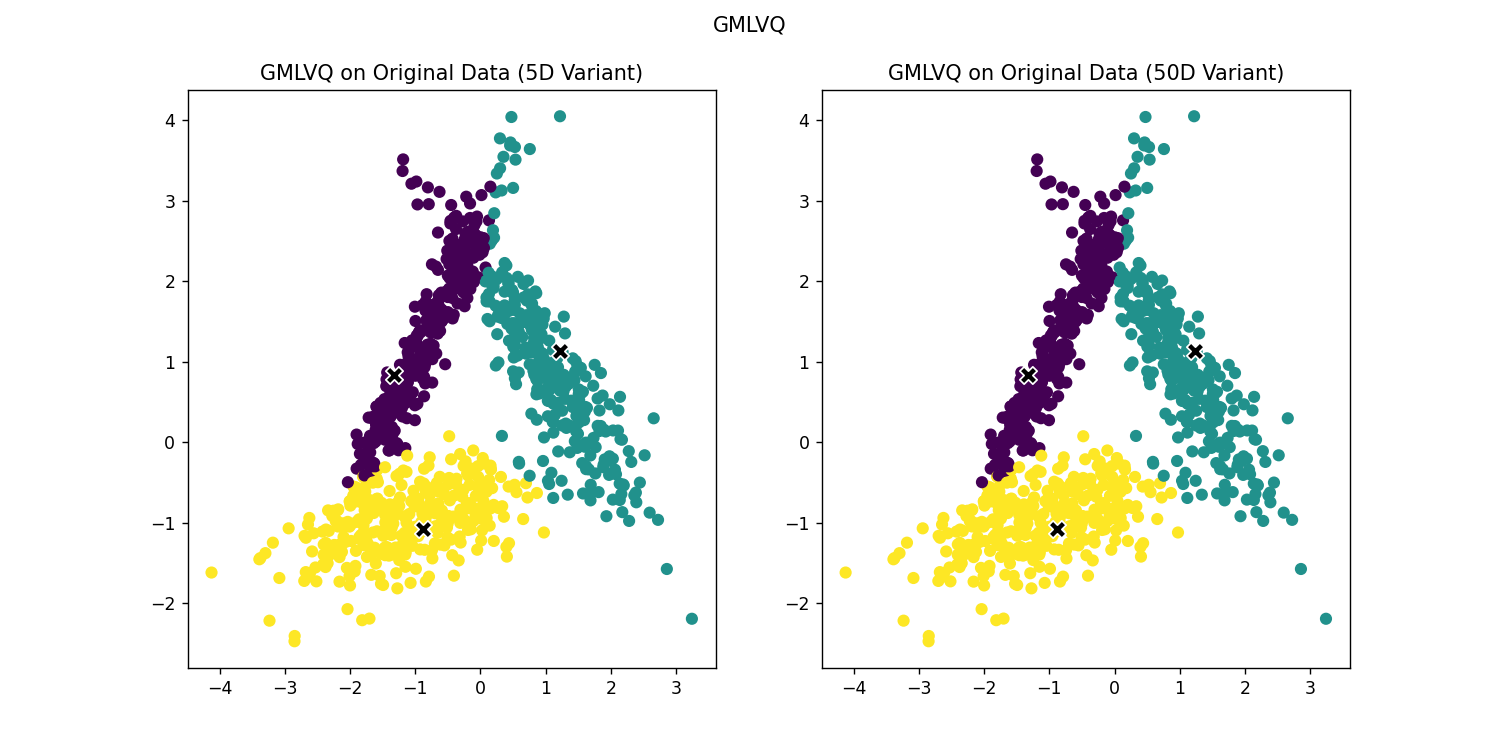

In [22]:
# GRLVQ Results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle("GRLVQ")
ax1.scatter(X[:, 0], X[:, 1], c=y_pred_5d_grlvq)
ax1.set_title("GRLVQ on Original Data (5D Variant)")
for w in grlvq_5d.w_:
    transformed_back = w.dot(inverse_matrix_5d);
    ax1.scatter(transformed_back[0], transformed_back[1], marker='X', s=100, c='black', edgecolors='white')

ax2.scatter(X[:, 0], X[:, 1], c=y_pred_50d_grlvq)
ax2.set_title("GRLVQ on Original Data (50D Variant)")
for w in grlvq_50d.w_:
    transformed_back = w.dot(inverse_matrix_50d);
    ax2.scatter(transformed_back[0], transformed_back[1], marker='X', s=100, c='black', edgecolors='white')
plt.show()

# GMLVQ Results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle("GMLVQ")
ax1.scatter(X[:, 0], X[:, 1], c=y_pred_5d_gmlvq)
ax1.set_title("GMLVQ on Original Data (5D Variant)")
for w in gmlvq_5d.w_:
    transformed_back = w.dot(inverse_matrix_5d);
    ax1.scatter(transformed_back[0], transformed_back[1], marker='X', s=100, c='black', edgecolors='white')

ax2.scatter(X[:, 0], X[:, 1], c=y_pred_50d_gmlvq)
ax2.set_title("GMLVQ on Original Data (50D Variant)")
for w in gmlvq_50d.w_:
    transformed_back = w.dot(inverse_matrix_50d);
    ax2.scatter(transformed_back[0], transformed_back[1], marker='X', s=100, c='black', edgecolors='white')
plt.show()


Result:
